<a href="https://colab.research.google.com/github/being-techie/Board_infinity/blob/main/Machine_Learning_Project_1_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><font color='brown' <b><U>Machine learning Assignment 1</b></u></h1>
<font color='BLUE'><b><h3 align="right">Submitted By:-Sushma Gupta</h3></b></font></p>

<h1 align="center"><font color='green' <b><u>Bank Marketing Prediction</b></u></h1>

### Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Loading the dataset

In [ ]:
df= pd.read_csv("H:/BoardInfinity/Machine Learning/bank-marketing.csv")

In [ ]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### a.Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [ ]:
df['pdays']

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
45206     -1
45207     -1
45208    184
45209     -1
45210    188
Name: pdays, Length: 45211, dtype: int64

In [ ]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

<b><span style = 'color:red'>As we can see that we are having -1 as a pday value which is very fishy as we can't have days in negative.</span></b>

####  b.Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [ ]:
df1=df.copy()

In [ ]:
df1

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df1['pdays']

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
45206     -1
45207     -1
45208    184
45209     -1
45210    188
Name: pdays, Length: 45211, dtype: int64

In [ ]:
df1=df1[df1["pdays"]>0]
    

In [ ]:
df1

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [ ]:
df1['pdays'].mean()

224.57769165556496

In [ ]:
df1['pdays'].median()

194.0

</b><span style ='color:green'>1. Now we see that the mean has increased than the previous one and more than the median thus it is positively skewed so we can say that the data is not normally distributed</span></b>


<span style = 'color:green'>2. We get a larger mean and median now</span>

#### c.Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [ ]:
df1=df1[df1['balance']>0]
df1

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24080,56,technician,60000,married,secondary,yes,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
24086,44,blue-collar,20000,married,secondary,yes,no,1324,yes,no,telephone,25,oct,119,1,89,2,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [ ]:
df1['education']

24060     tertiary
24064    secondary
24072     tertiary
24080    secondary
24086    secondary
           ...    
45199    secondary
45201     tertiary
45204    secondary
45208    secondary
45210    secondary
Name: education, Length: 7320, dtype: object

In [ ]:
medianbalance= df1.groupby('education')['balance'].median()

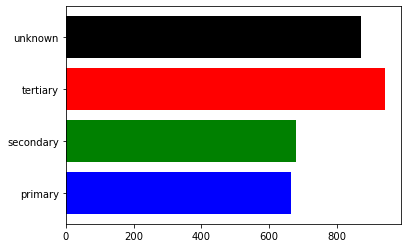

In [ ]:
x = medianbalance.index.tolist()
y = medianbalance.values.tolist()

plt.barh(x,y, color=['b','g','r','k'])
plt.show()

</b><span style ='color:brown'>We can see here tertiary has the highest median.</span></b>

####  d.Make a box plot for pdays. Do you see any outliers?

<AxesSubplot:>

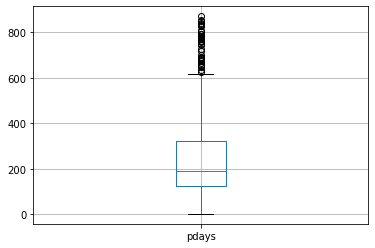

In [ ]:
df1.boxplot(['pdays'],grid = True)

 <span style = 'color:blue'> pdays has outliers </span>

### 2.Performing bi-variate analysis

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7320 entries, 24060 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7320 non-null   int64 
 1   job        7320 non-null   object
 2   salary     7320 non-null   int64 
 3   marital    7320 non-null   object
 4   education  7320 non-null   object
 5   targeted   7320 non-null   object
 6   default    7320 non-null   object
 7   balance    7320 non-null   int64 
 8   housing    7320 non-null   object
 9   loan       7320 non-null   object
 10  contact    7320 non-null   object
 11  day        7320 non-null   int64 
 12  month      7320 non-null   object
 13  duration   7320 non-null   int64 
 14  campaign   7320 non-null   int64 
 15  pdays      7320 non-null   int64 
 16  previous   7320 non-null   int64 
 17  poutcome   7320 non-null   object
 18  response   7320 non-null   object
dtypes: int64(8), object(11)
memory usage: 1.1+ MB


In [ ]:
df1['salary'].isnull().sum()

0

In [ ]:
df1['salary'].value_counts()

100000    1644
60000     1443
20000     1384
50000      953
70000      605
55000      457
4000       274
120000     203
8000       190
16000      136
0           31
Name: salary, dtype: int64

In [ ]:
df1['salary']

24060     50000
24064     70000
24072    100000
24080     60000
24086     20000
          ...  
45199     20000
45201    100000
45204     55000
45208     55000
45210    120000
Name: salary, Length: 7320, dtype: int64

In [ ]:
df1=df1[df1['salary']>0]
df1

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24080,56,technician,60000,married,secondary,yes,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
24086,44,blue-collar,20000,married,secondary,yes,no,1324,yes,no,telephone,25,oct,119,1,89,2,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [ ]:
df1['salary'].value_counts()

100000    1644
60000     1443
20000     1384
50000      953
70000      605
55000      457
4000       274
120000     203
8000       190
16000      136
Name: salary, dtype: int64

In [ ]:
df1['age'].value_counts()

33    386
32    367
34    345
37    334
35    328
     ... 
86      3
93      2
88      1
92      1
89      1
Name: age, Length: 72, dtype: int64

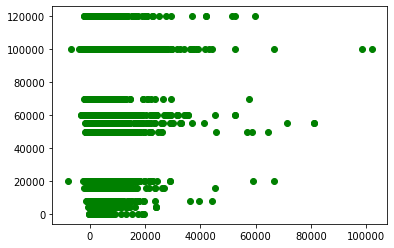

In [ ]:
plt.scatter(df['balance'], df['salary'], color = 'g')
plt.show()

####  a.Convert the response variable to a convenient form

In [ ]:
df1['response'].value_counts()

no     5531
yes    1758
Name: response, dtype: int64

In [ ]:
df1['response']=(df1['response'] == 'yes').astype(int)

In [ ]:
df1['response'].value_counts()

0    5531
1    1758
Name: response, dtype: int64

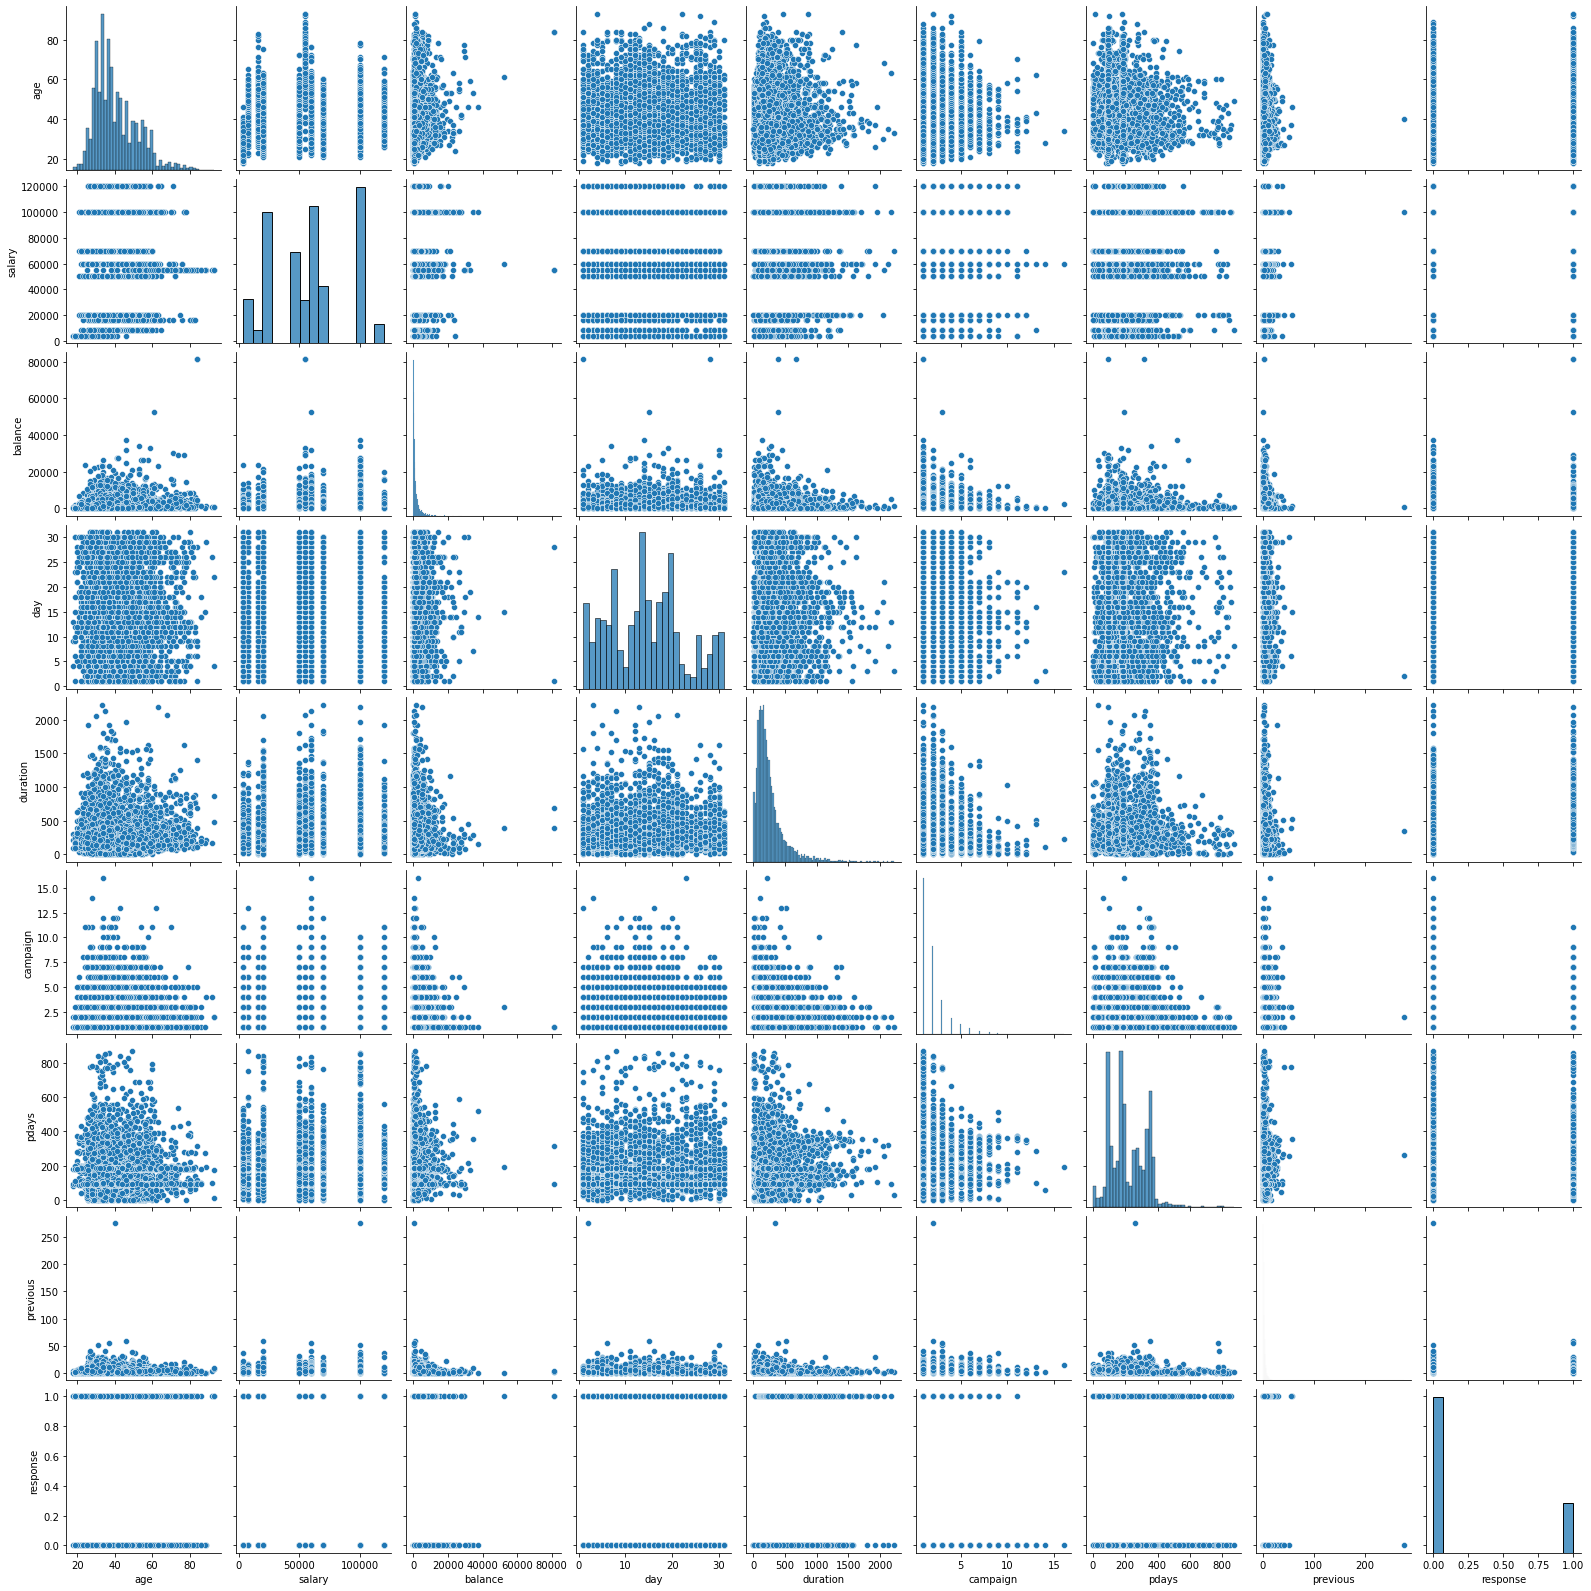

In [ ]:
sns.pairplot(df1)
plt.show()

In [ ]:
df1.corr()

,age,salary,balance,day,duration,campaign,pdays,previous,response
age,1.000000,0.061098,0.124647,0.018286,0.049368,0.005712,-0.100071,0.005012,0.076469
salary,0.061098,1.000000,0.067469,-0.002352,0.013662,-0.026497,-0.100935,0.030046,0.042781
balance,0.124647,0.067469,1.000000,0.048314,0.043904,-0.003301,-0.100513,0.000692,0.065837
day,0.018286,-0.002352,0.048314,1.000000,-0.012676,-0.029879,-0.078259,-0.019316,0.023925
duration,0.049368,0.013662,0.043904,-0.012676,1.000000,-0.079367,-0.023679,-0.000371,0.338820
campaign,0.005712,-0.026497,-0.003301,-0.029879,-0.079367,1.000000,0.052882,0.126485,-0.092406
pdays,-0.100071,-0.100935,-0.100513,-0.078259,-0.023679,0.052882,1.000000,-0.019681,-0.151284
previous,0.005012,0.030046,0.000692,-0.019316,-0.000371,0.126485,-0.019681,1.000000,0.006539
response,0.076469,0.042781,0.065837,0.023925,0.338820,-0.092406,-0.151284,0.006539,1.000000


<span style ='color:red'> If response increase than pdays and campaign are correlated becuase they are also increasing by 15.22% and 9.41% and when response decrease than duration also decrease by 34.26%</span>

<AxesSubplot:>

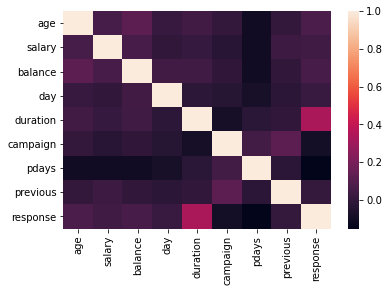

In [ ]:
sns.heatmap(df1.corr())

<h4><span style ='color:red'> Data is non-linear, asymmetric, hence selection of features doesn't depend upon the correlation factor</span></h4>

####  b.Make suitable plots for associations with numerical features and categorical features’

<AxesSubplot:xlabel='marital', ylabel='salary'>

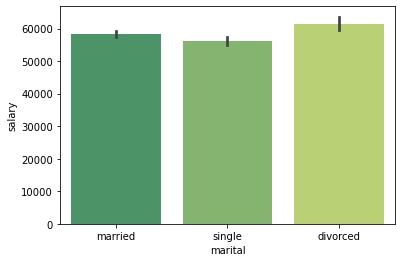

In [ ]:
 sns.barplot(x="marital" , y="salary",data=df1, palette = 'summer')

<span style ='color:green'>
we can infer that divorced are getting the maximum salary
</span>

<AxesSubplot:xlabel='month', ylabel='count'>

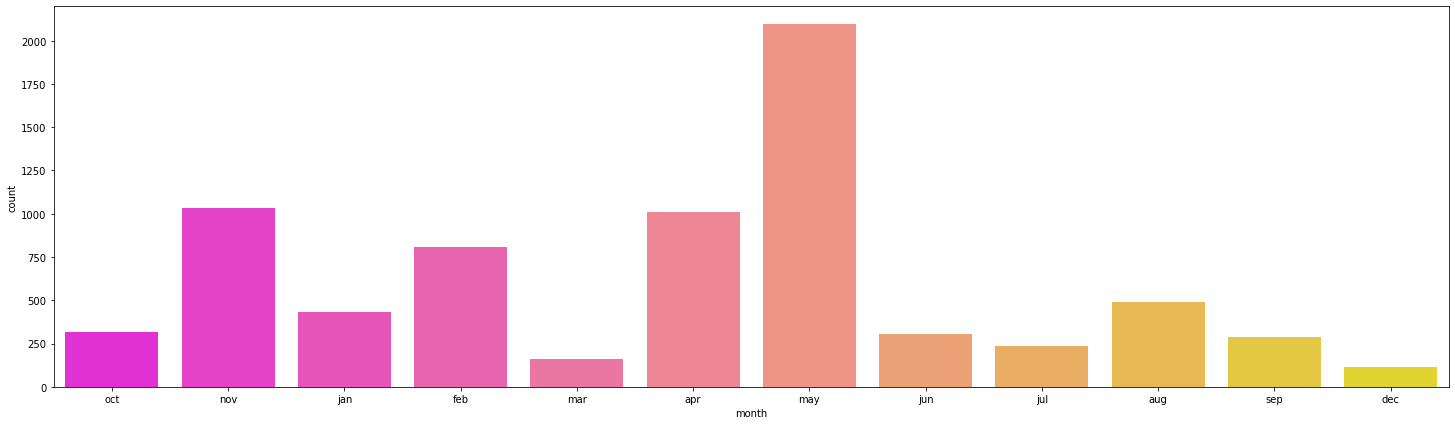

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot('month',data=df1,palette='spring')

<span style ='color:red'> 1.As we can see in the month of may we had the maximum no of days where the clients were not contacted</span>
    
    
  <span style ='color:red'> 2.The minimum being the month of december where the least calls were made</span>

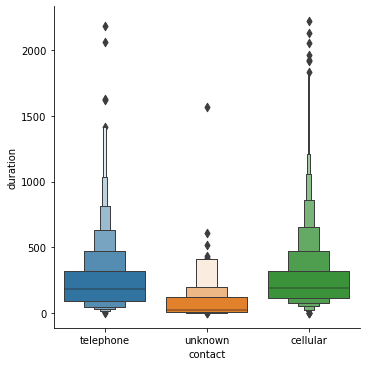

In [ ]:
sns.catplot(x='contact' , y='duration' , kind ="boxen", data =df1)

<b><span style = 'color:green'>                        cellular has more duration            <span></b>

<AxesSubplot:xlabel='salary', ylabel='job'>

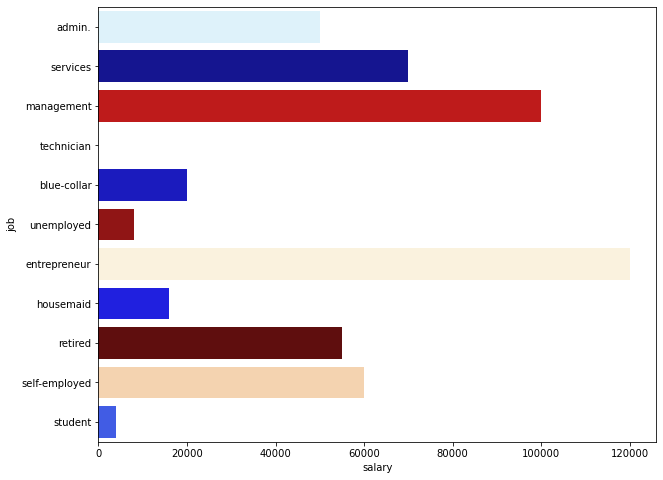

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y='job',x='salary',data=df1,palette='flag')

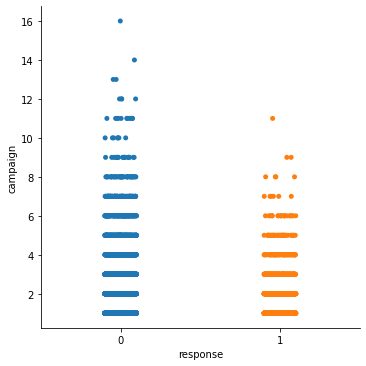

In [ ]:
sns.catplot("response","campaign",data=df1)

In [ ]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

### 3.Are the features about the previous campaign data useful?

In [ ]:
df['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

<b><span style ='color:green'>Yes, it is important as we can see no of contacts performed before this campaign for the client and further what actions can be taken so that the client subscribes.</span></b>

### 4.Are pdays and poutcome associated with the target?

In [ ]:
pd.crosstab(df1['poutcome'],df1['response'])

response,0,1
poutcome,,
failure,3711,553
other,1320,280
success,497,923
unknown,3,2


<b><span style ='color:blue'>Yes they are assosciated as we will see if the poutcome is positive or not thus getting an insight whether the client will subscribe, similarly with pdays we can see when was the client contacted the last time and thus can strategize and make a better pitch this time for the client so he subscribes</span></b>

### 5.If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision

<span style = 'color:red'>As we can see that approx 85 percent of the data has -1 the pdays value thus we would drop the values it will affect our analysis treated </span>

### 6.Before Predictive Modelling 

#### a.The necessary transformations for the categorical variables and the numeric variables
 

In [ ]:
df1

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24080,56,technician,60000,married,secondary,yes,no,589,yes,no,unknown,23,oct,518,1,147,2,success,1
24086,44,blue-collar,20000,married,secondary,yes,no,1324,yes,no,telephone,25,oct,119,1,89,2,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,success,1
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1


In [ ]:
del df1['targeted']
df1

,age,job,salary,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24064,33,services,70000,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24080,56,technician,60000,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,1
24086,44,blue-collar,20000,married,secondary,no,1324,yes,no,telephone,25,oct,119,1,89,2,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0
45201,53,management,100000,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,1
45204,73,retired,55000,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1
45208,72,retired,55000,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1


In [ ]:
no = LabelEncoder()

df1['housing'] = no.fit_transform(df1['housing'].astype('str'))
df1['loan'] = no.fit_transform(df1['loan'].astype('str'))
df1

,age,job,salary,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,no,882,0,0,telephone,21,oct,39,1,151,3,failure,0
24064,33,services,70000,married,secondary,no,3444,1,0,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,no,2415,1,0,telephone,22,oct,73,1,86,4,other,0
24080,56,technician,60000,married,secondary,no,589,1,0,unknown,23,oct,518,1,147,2,success,1
24086,44,blue-collar,20000,married,secondary,no,1324,1,0,telephone,25,oct,119,1,89,2,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,no,1475,1,0,cellular,16,nov,1166,3,530,12,other,0
45201,53,management,100000,married,tertiary,no,583,0,0,cellular,17,nov,226,1,184,4,success,1
45204,73,retired,55000,married,secondary,no,2850,0,0,cellular,17,nov,300,1,40,8,failure,1
45208,72,retired,55000,married,secondary,no,5715,0,0,cellular,17,nov,1127,5,184,3,success,1


In [ ]:
obj_col = []
num_col = []
for col in df1.columns:
    if df1[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)


In [ ]:
print('object column:',obj_col)
print('Numerical column',num_col)

object column: ['job', 'marital', 'education', 'default', 'contact', 'month', 'poutcome']
Numerical column ['age', 'salary', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


In [ ]:
df1['loan'].value_counts()

0    6395
1     894
Name: loan, dtype: int64

In [ ]:
df1['job'] = df1['job'].map(lambda x: x.rstrip("."))


In [ ]:
df1['job']

24060           admin
24064        services
24072      management
24080      technician
24086     blue-collar
             ...     
45199     blue-collar
45201      management
45204         retired
45208         retired
45210    entrepreneur
Name: job, Length: 7289, dtype: object

####  b.Handle variables corresponding to the previous campaign
 

In [ ]:
df1['poutcome'].value_counts()

failure    4264
other      1600
success    1420
unknown       5
Name: poutcome, dtype: int64

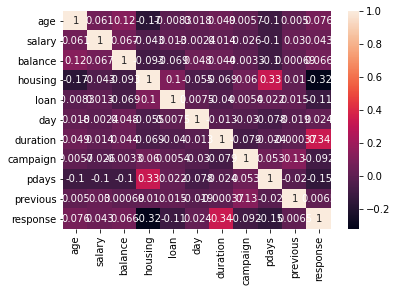

In [ ]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

####  c.Train test split
 


In [ ]:
df1.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [ ]:
x = df1.iloc[:, 1:-1]
print('Independent Variables are:\n', x.head(2))

Independent Variables are:
             job  salary  marital  education default  balance  housing  loan  \
24060     admin   50000  married   tertiary      no      882        0     0   
24064  services   70000  married  secondary      no     3444        1     0   

         contact  day month  duration  campaign  pdays  previous poutcome  
24060  telephone   21   oct        39         1    151         3  failure  
24064  telephone   21   oct       144         1     91         4  failure  


In [ ]:
y = df1.iloc[:, [-1]]
print('Target Variable is:\n', y.head(2))

Target Variable is:
        response
24060         0
24064         1


In [ ]:
X_train,X_valid,y_train,y_valid = train_test_split(x,y,test_size=0.2,random_state=22)

## Predictive model 1:Logistic regression

#### a. Make a predictive model using logistic regression


In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()

In [ ]:
df2 = df1[obj_col].apply(no.fit_transform)

In [ ]:
print(df2)

       job  marital  education  default  contact  month  poutcome
24060    0        1          2        0        1     10         0
24064    7        1          1        0        1     10         0
24072    4        1          2        0        1     10         1
24080    9        1          1        0        2     10         2
24086    1        1          1        0        1     10         1
...    ...      ...        ...      ...      ...    ...       ...
45199    1        2          1        0        0      9         1
45201    4        1          2        0        0      9         2
45204    5        1          1        0        0      9         0
45208    5        1          1        0        0      9         2
45210    2        1          1        0        0      9         1

[7289 rows x 7 columns]


In [ ]:
data_prep=df2.join(df1[num_col])
data_prep

,job,marital,education,default,contact,month,poutcome,age,salary,balance,housing,loan,day,duration,campaign,pdays,previous,response
24060,0,1,2,0,1,10,0,33,50000,882,0,0,21,39,1,151,3,0
24064,7,1,1,0,1,10,0,33,70000,3444,1,0,21,144,1,91,4,1
24072,4,1,2,0,1,10,1,36,100000,2415,1,0,22,73,1,86,4,0
24080,9,1,1,0,2,10,2,56,60000,589,1,0,23,518,1,147,2,1
24086,1,1,1,0,1,10,1,44,20000,1324,1,0,25,119,1,89,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,0,0,9,1,34,20000,1475,1,0,16,1166,3,530,12,0
45201,4,1,2,0,0,9,2,53,100000,583,0,0,17,226,1,184,4,1
45204,5,1,1,0,0,9,0,73,55000,2850,0,0,17,300,1,40,8,1
45208,5,1,1,0,0,9,2,72,55000,5715,0,0,17,1127,5,184,3,1


In [ ]:
data_prep.corr()
#to find correlation between variables and if both variables are positively increasing then the value is positive and versa.
# IF 0 no correlation between variable

,job,marital,education,default,contact,month,poutcome,age,salary,balance,housing,loan,day,duration,campaign,pdays,previous,response
job,1.000000,0.078644,0.154690,-0.010322,-0.007470,-0.001024,0.067374,-0.035130,0.115167,0.039792,-0.124547,-0.028605,0.013213,0.023663,-0.008544,-0.108635,0.000618,0.077822
marital,0.078644,1.000000,0.127081,-0.008111,-0.031153,-0.025148,0.039380,-0.419370,-0.048225,-0.033169,-0.060857,-0.046346,0.020554,-0.001758,-0.005958,-0.016692,0.002485,0.050089
education,0.154690,0.127081,1.000000,-0.015769,-0.047686,-0.007908,0.081933,-0.129147,0.430918,0.072035,-0.130590,-0.041686,0.018354,-0.001662,-0.022473,-0.133412,0.002284,0.105956
default,-0.010322,-0.008111,-0.015769,1.000000,-0.006129,0.011616,-0.010441,-0.016538,0.004486,-0.021120,0.000522,0.031956,0.018064,0.011260,-0.010396,0.014922,0.006216,-0.015128
contact,-0.007470,-0.031153,-0.047686,-0.006129,1.000000,0.052815,0.022564,0.160241,-0.033574,0.028522,-0.060103,-0.014554,-0.006040,-0.044139,0.066728,0.082604,0.043130,-0.015509
month,-0.001024,-0.025148,-0.007908,0.011616,0.052815,1.000000,-0.003880,0.016277,0.023810,0.025055,0.003565,-0.003489,-0.022001,-0.029552,0.023615,0.008663,0.010148,-0.001452
poutcome,0.067374,0.039380,0.081933,-0.010441,0.022564,-0.003880,1.000000,0.056189,0.013570,0.038637,-0.291739,-0.101798,0.008354,0.114797,-0.000612,-0.231832,0.036917,0.426807
age,-0.035130,-0.419370,-0.129147,-0.016538,0.160241,0.016277,0.056189,1.000000,0.061098,0.124647,-0.170455,-0.008327,0.018286,0.049368,0.005712,-0.100071,0.005012,0.076469
salary,0.115167,-0.048225,0.430918,0.004486,-0.033574,0.023810,0.013570,0.061098,1.000000,0.067469,-0.043288,0.012818,-0.002352,0.013662,-0.026497,-0.100935,0.030046,0.042781
balance,0.039792,-0.033169,0.072035,-0.021120,0.028522,0.025055,0.038637,0.124647,0.067469,1.000000,-0.093321,-0.069304,0.048314,0.043904,-0.003301,-0.100513,0.000692,0.065837


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(42)

In [ ]:
X = data_prep.drop("response", axis=1)
X.head()

,job,marital,education,default,contact,month,poutcome,age,salary,balance,housing,loan,day,duration,campaign,pdays,previous
24060,0,1,2,0,1,10,0,33,50000,882,0,0,21,39,1,151,3
24064,7,1,1,0,1,10,0,33,70000,3444,1,0,21,144,1,91,4
24072,4,1,2,0,1,10,1,36,100000,2415,1,0,22,73,1,86,4
24080,9,1,1,0,2,10,2,56,60000,589,1,0,23,518,1,147,2
24086,1,1,1,0,1,10,1,44,20000,1324,1,0,25,119,1,89,2


In [ ]:
y= data_prep[['response']]
y.head()

,response
24060,0
24064,1
24072,0
24080,1
24086,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
val=cross_val_score(log_reg,X_train,y_train,cv=5)

In [ ]:
print(np.mean(val))

0.7689930786744096


In [ ]:
y_pred=log_reg.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1119
           1       0.59      0.21      0.31       339

    accuracy                           0.78      1458
   macro avg       0.69      0.58      0.59      1458
weighted avg       0.75      0.78      0.74      1458



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[1069   50]
 [ 268   71]]


In [ ]:
f1_score(y_pred,y_test)
#F1 = 2 * (precision * recall) / (precision + recall)

0.3086956521739131

####  b.Use RFE to select top n features in an automated fashion (choose n as you see fit)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(log_reg, 5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [ ]:
rfe.support_


array([False, False,  True,  True, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False])

In [ ]:
X_train.columns[rfe.support_]

Index(['education', 'default', 'poutcome', 'housing', 'loan'], dtype='object')

In [ ]:
cols = X_train.columns[rfe.support_]

In [ ]:
log_reg.fit(X_train[cols],y_train)

LogisticRegression()

In [ ]:
y_pred2 = log_reg.predict(X_test[cols])

In [ ]:
f1_score(y_pred2,y_test)

0.5271028037383179

In [ ]:
confusion_matrix(y_pred2,y_test)

array([[1064,  198],
       [  55,  141]], dtype=int64)

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train.head()

,job,marital,education,default,contact,month,poutcome,age,salary,balance,housing,loan,day,duration,campaign,pdays,previous
25494,4,2,2,0,0,9,0,30,100000,54,1,1,19,192,1,177,3
37766,4,1,1,0,0,8,0,36,100000,1825,1,0,14,24,1,346,1
25382,4,2,2,0,0,9,0,51,100000,6030,1,0,18,157,2,110,3
38247,7,1,1,0,0,8,0,47,70000,1474,1,0,15,77,1,368,3
38318,1,0,1,0,0,8,1,36,20000,421,1,0,15,34,7,360,4


In [ ]:
X_train_sm = sm.add_constant(X_train[cols])

X_train_sm.head()

,const,education,default,poutcome,housing,loan
25494,1.0,2,0,0,1,1
37766,1.0,1,0,0,1,0
25382,1.0,2,0,0,1,0
38247,1.0,1,0,0,1,0
38318,1.0,1,0,1,1,0


In [ ]:
reg1 = sm.OLS(endog=y_train,exog= X_train_sm).fit()

In [ ]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     348.7
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:26:19   Log-Likelihood:                -2577.1
No. Observations:                5831   AIC:                             5166.
Df Residuals:                    5825   BIC:                             5206.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2062      0.014     15.133      0.000       0.179       0.233
education      0.0305      0.007      4.432      0.000       0.017       0.044
default       -0.0570      0.094     -0.604      0.546      -0.242       0.128
poutcome       0.1910      0.006     29.462      0.000       0.178       0.204
housing       -0.1837      0.011    -17.218      0.000      -0.205      -0.163
loan          -0.0613      0.015     -4.019      0.000      -0.091      -0.031
==============================================================================
Omnibus:                      564.291   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              742.055
Skew:                           0.870   Prob(JB):                    7.32e-162
Kurtosis:                       3.158   Cond. No.                         37.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  c.Using p values and VIF, get rid of the redundant features

In [ ]:
from statsmodels.stats .outliers_influence import variance_inflation_factor

<span style ='color:blue'>1 = not correlated. Between 1 and 5 = moderately correlated. Greater than 5 = highly correlated.</span>

In [ ]:
vif=pd.DataFrame()

In [ ]:
vif['features']=X_train.columns

In [ ]:
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [ ]:
print(vif)

     features   VIF
7         age  9.15
8      salary  5.47
2   education  5.23
15      pdays  4.92
1     marital  4.42
12        day  4.05
5       month  3.46
10    housing  2.96
0         job  2.86
14   campaign  2.81
13   duration  2.30
6    poutcome  1.78
16   previous  1.44
9     balance  1.36
11       loan  1.16
4     contact  1.15
3     default  1.01


#####  d.Estimate the model performance using k fold cross validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(3, True, 1)

####  e.Which features are the most important from your model?


<span style ='color:blue'> Housing, loan, default, poutcome are important feature from logistic regression model perspective</span>

## Predictive model 2: Random Forest

####  a.Make a predictive model using random forest technique

In [ ]:
from sklearn.ensemble import RandomForestClassifier

####  b.Use not more than 50 trees, and control the depth of the trees to prevent overfitting


In [ ]:
classifier=RandomForestClassifier(n_estimators=100,max_features=5,max_depth=5,criterion='entropy',random_state=0)

In [ ]:
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=5,
                       random_state=0)

####  c.Estimate the model performance using k fold cross validation

In [ ]:
score=cross_val_score(classifier,X_train,y_train,cv=5)

In [ ]:
print(np.mean(score))

0.833989602578631


In [ ]:
y_pred1 = classifier.predict(X_test)

#### d.What is the precision, recall, accuracy of your model?


In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1119
           1       0.77      0.46      0.58       339

    accuracy                           0.84      1458
   macro avg       0.81      0.71      0.74      1458
weighted avg       0.84      0.84      0.83      1458



In [ ]:
confusion_matrix(y_test,y_pred1)

array([[1073,   46],
       [ 183,  156]], dtype=int64)

####  e.Using the feature importance values from the Random Forest module, identify the most important features for the model


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
rfe1 = RFE(classifier, 5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(criterion='entropy', max_depth=5,
                                     max_features=5, random_state=0),
    n_features_to_select=5)

In [ ]:
rfe1.support_

array([False, False, False, False, False, False,  True, False, False,
        True,  True, False, False,  True, False,  True, False])

In [ ]:
X_train.columns[rfe1.support_]

Index(['poutcome', 'balance', 'housing', 'duration', 'pdays'], dtype='object')

In [ ]:
classifier.fit(X_train[cols],y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=5,
                       random_state=0)

In [ ]:
y_pred3 = classifier.predict(X_test[cols])

In [ ]:
f1_score(y_pred3,y_test)

0.5612244897959183

In [ ]:
confusion_matrix(y_pred3,y_test)

array([[1035,  174],
       [  84,  165]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1119
           1       0.66      0.49      0.56       339

    accuracy                           0.82      1458
   macro avg       0.76      0.71      0.73      1458
weighted avg       0.81      0.82      0.81      1458



In [ ]:
val1=cross_val_score(classifier,X_train,y_train,cv=5)

In [ ]:
print(np.mean(val1))

0.833989602578631


## Compare the performance of the Random Forest and the logistic model –

#### a.Evaluate both models on the test set

<span style='color:red'> Already done above</span>

#### b.Which metric did you choose and why?

<span style='color:red'>Various ways to check the performance of our machine learning : Confusion matrix Accuracy Precision Recall Specificity F1 score Precision-Recall</span>

####  c.Which model has better performance on the test set? 

<span style ='color:red'> Random forest has the better performance</span>

####  d.Compare the feature importance from the different models – do they agree? Are the top features similar in both models? 

<span style = 'color:red' > No, some of them are different</span>